# (Core) Project 4 - Part 1
- Daniel Barella 
-3/31/23

## INSTRUCTIONS
For this assignment, you will be starting an additional portfolio project that you will continue to build on over the remaining weeks of this stack.

- For Part 1, you will be downloading and preparing a crime dataset for time series analysis.
- You will then answer provided stakeholder questions and support your answers with visualizations.


## Chicago Crime Data
- Source: Chicago Data Portal: Crimes 2001 to Present
    - Data Description:
        - All Crimes that were reported in the city of Chicago and their details
        - View Preview
    - Includes:
        - type of crime, exact date/time, lat/long, District/ward, was there an arrest, etc.
    - Note: the .csv is very large and needs to be processed into smaller files to fit inside a GitHub repository. We have provided a helper notebook below to process your downloaded file into a repo-friendly format.
- Data Processing Helper Notebook:
    - Use the helper notebook in this repository to process your manually-downloaded csv into several .csv.gz files: https://github.com/coding-dojo-data-science/preparing-chicago-crime-data
    - You can either Fork your own copy of the repository and rename it to be your "Project 4" repository, or you can download the notebook and save it in your own repository.
- Supplemental Data: Holiday Data
    - To answer some of the possible questions, you may need to perform some feature engineering, like adding holiday information from an API.
    - We have provided an extract of holidays, but you may wish to extract additional holiday information for dates not included in this file.
        - Share URL
        - Raw CSV URL (Pandas): https://docs.google.com/spreadsheets/d/e/2PACX-1vTMR4vi1nFtbYO_WLqecU6WoRAQ0F-_QCMcuWUoZhuTygAP2U668cddCWBeAV2eop9fFdyXX856AB2j/pub?output=csv
- Notes/Considerations:
    - You may need to keep 2 forms of the data:
        - The original individual crime data with a datetime index. (Each row is 1 crime)
        - A resampled/converted crime counts version (Each row is 1 day)

## Task

Your task is to answer a series of questions about trends in crimes in Chicago for a reporter for the local newspaper.

- Stakeholder Questions to Answer (pick at least 3 topics) Select 3 or more of the following topics to analyze:
    - 1) Comparing Police Districts:
        - Which district has the most crimes? Which has the least?
    - 2) Crimes Across the Years:
        - Is the total number of crimes increasing or decreasing across the years?
        - Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?
    - 3) Comparing AM vs. PM Rush Hour:
        - Are crimes more common during AM rush hour or PM rush hour?
            - You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
            - You can consider any crime that occurred between 4 -7 PM as PM rush hour.
        - What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
        - Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?
- 4) Comparing Months:
    - What months have the most crime? What months have the least?
    - Are there any individual crimes that do not follow this pattern? If so, which crimes?
- 5) Comparing Holidays:
    - Are there any holidays that show an increase in the # of crimes?
    - Are there any holidays that show a decrease in the # of crimes?

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import holidays
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)

In [2]:
import glob
folder = "Data/Chicago/"
crime_files = sorted(glob.glob(folder+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])

In [3]:
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.0,NaN,41.967833,-87.739978
1,1323691,01/01/2001 01:00:00 AM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,41.866694,-87.688513
2,3206463,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.0,18.0,41.735507,-87.690095
3,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909
4,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
...,...,...,...,...,...,...,...,...,...,...,...,...
53782,13019615,03/24/2023 12:42:00 AM,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,815,8.0,14.0,41.806721,-87.743129
53783,13019670,03/24/2023 12:47:00 AM,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,ALLEY,False,False,1115,11.0,28.0,41.882005,-87.729022
53784,13020850,03/24/2023 12:50:00 PM,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,122,1.0,42.0,41.880655,-87.634198
53785,13019740,03/24/2023 12:50:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,632,6.0,8.0,41.741229,-87.602526


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7764591 entries, 0 to 53786
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 666.4+ MB


# 1) Comparing Police Districts:
- A. Which district has the most crimes? 
- B. Which has the least?

In [5]:
df['District'].value_counts().sort_values(ascending=False)

8.0     521924
11.0    498584
6.0     453935
7.0     449561
25.0    441829
4.0     440818
3.0     393830
12.0    384429
9.0     379485
2.0     367347
18.0    348362
19.0    348359
5.0     344216
10.0    334488
15.0    333109
1.0     313512
14.0    300491
16.0    259704
22.0    254460
24.0    234479
17.0    224140
20.0    137246
31.0       232
21.0         4
Name: District, dtype: int64

- A. District 8.0 has the most incedents of crimes with 521,924. 
- B. While District 21.0 has the lowest amount with only 4

# 2) Crimes Across the Years:
- A. Is the total number of crimes increasing or decreasing across the years?
- B. Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [6]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

In [7]:
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year
0,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.0,NaN,41.967833,-87.739978,2001
1,1323691,01/01/2001 01:00:00 AM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,41.866694,-87.688513,2001
2,3206463,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.0,18.0,41.735507,-87.690095,2001
3,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909,2001
4,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001


In [8]:
crime_counts = df.groupby('Year').size()


## A. Is the total number of crimes increasing or decreasing across the years?

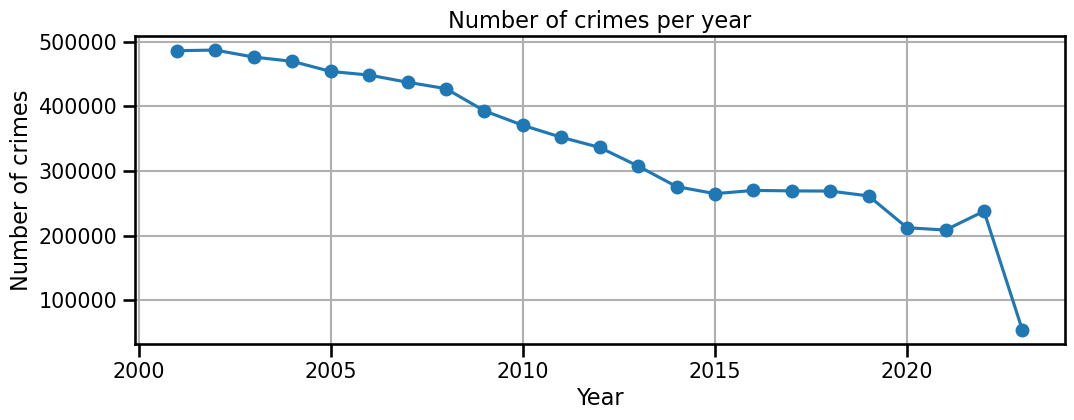

In [9]:
ax = crime_counts.plot(style='o-',grid=True)
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.title('Number of crimes per year')
plt.show()

- A. The total number of crimes has been decreasing over the years.

## B. Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [10]:
df_filtered = df[df['Year'] != 2023]


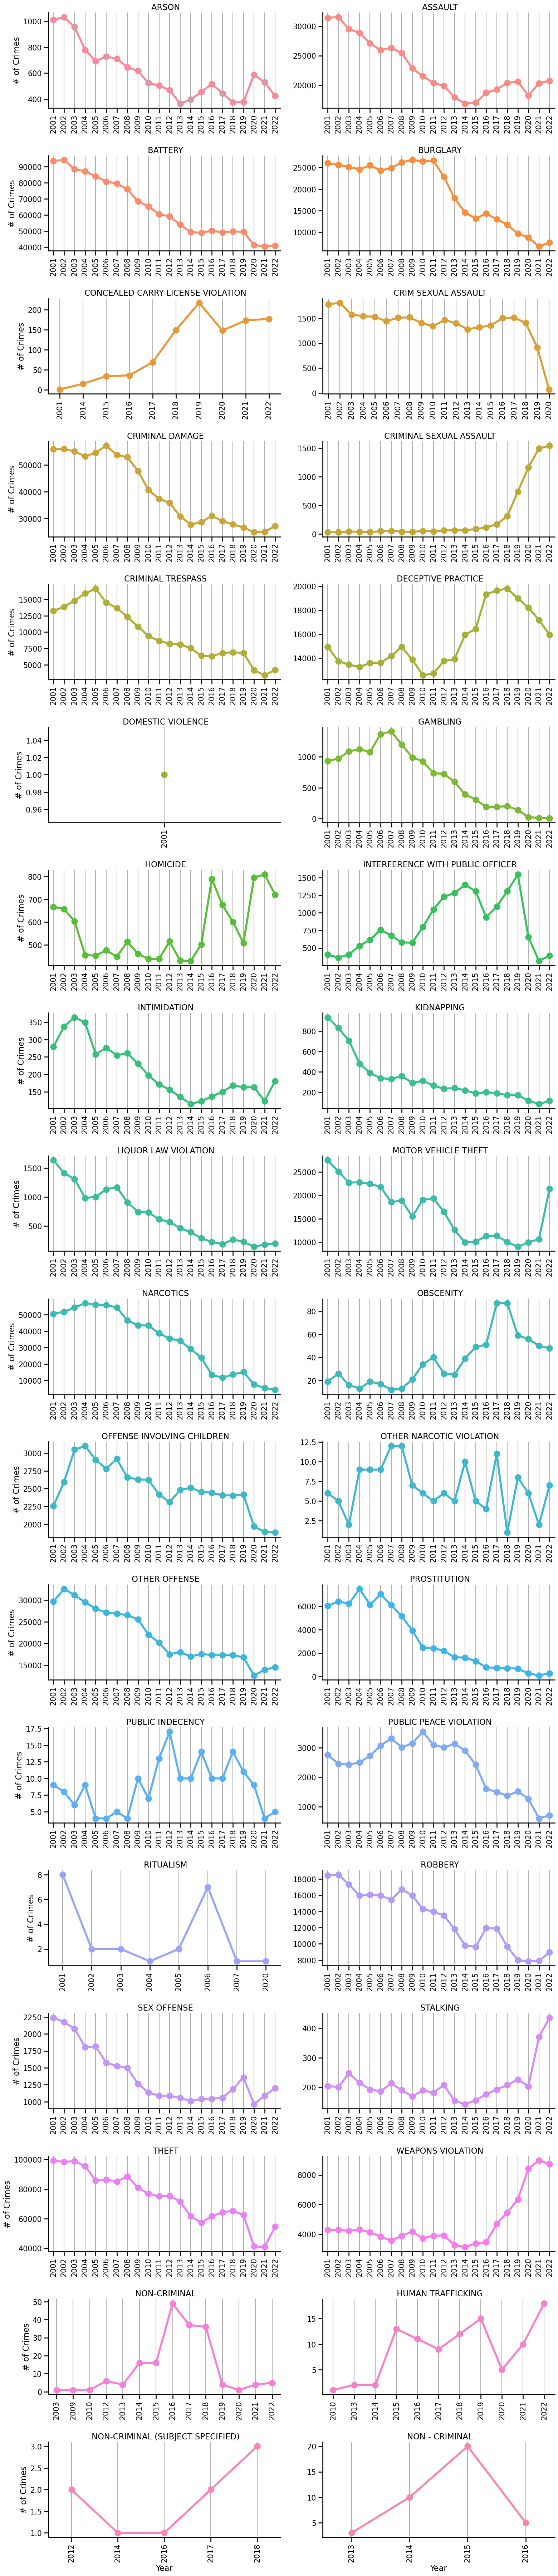

In [11]:
crime_counts = df_filtered.groupby(['Year','Primary Type']).size().reset_index(name='# of Crimes')
g = sns.catplot(data=crime_counts.reset_index(), x='Year', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
                sharey=False, sharex=False)
g.set_xticklabels(rotation=90)
g.fig.subplots_adjust(hspace=0.5)

for ax in g.axes.flat:
    ax.set(title=ax.get_title().split('=')[1])
    ax.grid(axis='x')


- B. Since 2020, there has been some slight upward trends across the board. But the 'Primary Type's that have been trending up are 'CONCEALED CARRY LICENSE VIOLATION', 'CRIMINAL SEXUAL ASSAULT', 'HOMICIDE', 'MOTOR VEHICLE THEFT', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'STALKING', 'WEAPONS VIOLATION', and 'HUMAN TRAFFICKING'.

## 5) Comparing Holidays:
- A. Are there any holidays that show an increase in the # of crimes?
- B. Are there any holidays that show a decrease in the # of crimes?

In [13]:
import holidays
import datetime as dt
from holidays import country_holidays

In [14]:
## making a date range that covers full dataset
all_days = pd.date_range(df["Date"].min(), df["Date"].max())
all_days

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-02 01:00:00',
               '2001-01-03 01:00:00', '2001-01-04 01:00:00',
               '2001-01-05 01:00:00', '2001-01-06 01:00:00',
               '2001-01-07 01:00:00', '2001-01-08 01:00:00',
               '2001-01-09 01:00:00', '2001-01-10 01:00:00',
               ...
               '2022-12-22 01:00:00', '2022-12-23 01:00:00',
               '2022-12-24 01:00:00', '2022-12-25 01:00:00',
               '2022-12-26 01:00:00', '2022-12-27 01:00:00',
               '2022-12-28 01:00:00', '2022-12-29 01:00:00',
               '2022-12-30 01:00:00', '2022-12-31 01:00:00'],
              dtype='datetime64[ns]', length=8035, freq='D')

In [15]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [16]:
## Testing first date
print(all_days[0])
us_holidays.get(all_days[0])

2001-01-01 01:00:00


"New Year's Day"

In [17]:
## Getting us holidays for all dates
holiday_list = [us_holidays.get(day) for day in all_days]
holiday_list[:5]

["New Year's Day", None, None, None, None]

In [19]:
# For a specific subdivisions (e.g. state or province):
il_holidays = country_holidays('US', subdiv='IL')
il_holidays

holidays.country_holidays('US', subdiv='IL')

In [20]:
## Saving both holiday types as columns
df["US Holiday"] = [us_holidays.get(day) for day in df['Date']]
df['IL Holiday'] = [il_holidays.get(day) for day in df['Date']]
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year,US Holiday,IL Holiday
0,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.0,NaN,41.967833,-87.739978,2001,New Year's Day,New Year's Day
1,1323691,01/01/2001 01:00:00 AM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,41.866694,-87.688513,2001,New Year's Day,New Year's Day
2,3206463,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.0,18.0,41.735507,-87.690095,2001,New Year's Day,New Year's Day
3,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909,2001,New Year's Day,New Year's Day
4,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001,New Year's Day,New Year's Day


In [21]:
## US Holidays
df['US Holiday'].value_counts()

New Year's Day                                     33487
Independence Day                                   22663
Labor Day                                          22155
Memorial Day                                       21123
Columbus Day                                       20915
Veterans Day                                       20416
Martin Luther King Jr. Day                         18587
Washington's Birthday                              18223
Thanksgiving                                       14791
Christmas Day                                      12413
Independence Day (Observed)                         5884
Veterans Day (Observed)                             5842
New Year's Day (Observed)                           5513
Christmas Day (Observed)                            4927
Juneteenth National Independence Day                1450
Juneteenth National Independence Day (Observed)     1398
Name: US Holiday, dtype: int64

In [ ]:
# Create a new column in the DataFrame indicating whether the date is a US holiday or not
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
holidays = cal.holidays(start=df.index.min(), end=df.index.max())

df['US Holidays'] = df.index.isin(holidays)

# Group the data by date and holiday and count the number of crimes
crime_counts = df.groupby(['Date', 'US Holidays']).size().reset_index(name='Crime Count')

# Pivot the DataFrame to have the holidays as their own columns
holiday_counts = crime_counts.pivot_table(index='Date', columns='US Holidays', values='Crime Count', fill_value=0)

# Plot each holiday separately
for col in holiday_counts.columns:
    plt.figure(figsize=(15,5))
    sns.lineplot(data=holiday_counts[col])
    plt.title(f'Trend of {col} over Full Dataset Period')
    plt.xlabel('Date')
    plt.ylabel('# of Crimes')
    plt.show()


KeyboardInterrupt: 